In [14]:
import numpy as np
import pandas as pd
import mxnet as mx 
import matplotlib.pyplot as plt
import plotly.plotly as py
import logging

logging.basicConfig(level=logging.DEBUG)

In [15]:
train1=pd.read_csv('../data/train.csv')

In [16]:
train1.shape

(42000, 785)

In [17]:
train1.iloc[0:4, 0:15]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
train=np.asarray(train1.iloc[0:33600,:])

In [19]:
cv=np.asarray(train1.iloc[33600:,:])

In [20]:
_train=train[:,1:]

In [21]:
_train.shape

(33600, 784)

In [22]:
_cv=cv[:,1:]

In [23]:
_cv.shape

(8400, 784)

In [24]:
trainx=np.reshape(_train, (_train.shape[0],1,28,28))/255

In [25]:
cvx=np.reshape(_cv, (_cv.shape[0],1,28,28))/255

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/pietro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


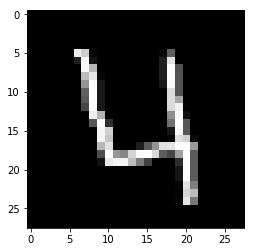

In [26]:
ix=3
img=np.asarray(np.matrix(trainx[ix,0,:,:]))
plt.imshow(img, cmap='Greys_r')
plt.show()

In [27]:
trainy=np.asarray(train[:,0])

In [28]:
cvy=np.asarray(cv[:,0])

In [29]:
trainy.shape

(33600,)

FULLY CONNECTED NEURAL NETWORK
===========================

In [30]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first fullc layer
flatten = mx.sym.flatten(data=data)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc1, act_type="relu") 

# output fullc
fc3 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Softmax output
SNN = mx.symbol.SoftmaxOutput(data=fc3, label=Y, name="SNN") 


In [31]:
SNN_model = mx.mod.Module(symbol=SNN, label_names =['softmax_label'], context=mx.cpu())

In [32]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

SNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', 
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 25691.58 samples/sec	accuracy=0.807164
INFO:root:Epoch[0] Train-accuracy=0.919333
INFO:root:Epoch[0] Time cost=1.408
INFO:root:Epoch[0] Validation-accuracy=0.933810
INFO:root:Epoch[1] Batch [200]	Speed: 24465.87 samples/sec	accuracy=0.943632
INFO:root:Epoch[1] Train-accuracy=0.953704
INFO:root:Epoch[1] Time cost=1.365
INFO:root:Epoch[1] Validation-accuracy=0.954286
INFO:root:Epoch[2] Batch [200]	Speed: 24888.19 samples/sec	accuracy=0.963831
INFO:root:Epoch[2] Train-accuracy=0.966741
INFO:root:Epoch[2] Time cost=1.627
INFO:root:Epoch[2] Validation-accuracy=0.961190
INFO:root:Epoch[3] Batch [200]	Speed: 24366.09 samples/sec	accuracy=0.973980
INFO:root:Epoch[3] Train-accuracy=0.976000
INFO:root:Epoch[3] Time cost=1.385
INFO:root:Epoch[3] Validation-accuracy=0.965714
INFO:root:Epoch[4] Batch [200]	Speed: 24050.02 samples/sec	accuracy=0.980846
INFO:root:Epoch[4] Train-accuracy=0.982148
INFO:root:Epoch[4] Time cost=1.720
INFO:root:Epoch[4] Validation-acc

DEEP FULLY CONNECTED NEURAL NETWORK
===========================

In [33]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first fullc layer
flatten = mx.sym.flatten(data=data)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin1 = mx.sym.Activation(data=fc1, act_type="relu") 

# second fullc layer
fc2 = mx.symbol.FullyConnected(data=nlin1, num_hidden=500)
nlin2 = mx.sym.Activation(data=fc2, act_type="relu") 

# third fullc layer
fc3 = mx.symbol.FullyConnected(data=nlin2, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc3, act_type="relu") 

# output fullc
fc4 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Softmax output
DNN = mx.symbol.SoftmaxOutput(data=fc4, label=Y, name="DNN") 

In [34]:
DNN_model = mx.mod.Module(symbol=DNN, label_names =['softmax_label'], context=mx.cpu())

In [35]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

DNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', 
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 8885.92 samples/sec	accuracy=0.108905
INFO:root:Epoch[0] Train-accuracy=0.180222
INFO:root:Epoch[0] Time cost=3.767
INFO:root:Epoch[0] Validation-accuracy=0.372500
INFO:root:Epoch[1] Batch [200]	Speed: 9020.95 samples/sec	accuracy=0.735771
INFO:root:Epoch[1] Train-accuracy=0.904963
INFO:root:Epoch[1] Time cost=3.961
INFO:root:Epoch[1] Validation-accuracy=0.931667
INFO:root:Epoch[2] Batch [200]	Speed: 8828.85 samples/sec	accuracy=0.936418
INFO:root:Epoch[2] Train-accuracy=0.952074
INFO:root:Epoch[2] Time cost=3.776
INFO:root:Epoch[2] Validation-accuracy=0.956548
INFO:root:Epoch[3] Batch [200]	Speed: 8976.39 samples/sec	accuracy=0.957512
INFO:root:Epoch[3] Train-accuracy=0.966593
INFO:root:Epoch[3] Time cost=3.766
INFO:root:Epoch[3] Validation-accuracy=0.961786
INFO:root:Epoch[4] Batch [200]	Speed: 8593.95 samples/sec	accuracy=0.970945
INFO:root:Epoch[4] Train-accuracy=0.976593
INFO:root:Epoch[4] Time cost=4.418
INFO:root:Epoch[4] Validation-accuracy

CONVOLUTIONAL NEURAL NETWORK
===========================

In [36]:
data = mx.sym.var('data')
Y= mx.symbol.Variable('softmax_label') 

# first conv layer
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=20)
nlin1 = mx.sym.Activation(data=conv1, act_type="relu")
pool1 = mx.sym.Pooling(data=nlin1, pool_type="max", kernel=(2,2), stride=(2,2))
drop1 = mx.symbol.Dropout(data=pool1,p=0.5)
# second conv layer
conv2 = mx.sym.Convolution(data=drop1, kernel=(5,5), num_filter=40)
nlin2 = mx.sym.Activation(data=conv2, act_type="relu")
pool2 = mx.sym.Pooling(data=nlin2, pool_type="max", kernel=(2,2), stride=(2,2))
drop2 = mx.symbol.Dropout(data=pool2,p=0.5)
# first fullc layer
flatten = mx.sym.flatten(data=drop2)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500)
nlin3 = mx.sym.Activation(data=fc1, act_type="relu")

# output fullc
fc2 = mx.sym.FullyConnected(data=nlin3, num_hidden=10)
# Softmax output
CNN = mx.symbol.SoftmaxOutput(data=fc2, label=Y,name="CCN")

In [37]:
CNN_model = mx.mod.Module(symbol=CNN, label_names =['softmax_label'], context=mx.cpu())

In [ ]:
batch_size = 100
train_iter = mx.io.NDArrayIter(trainx, trainy, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(cvx, cvy, batch_size)

CNN_model.fit(train_iter,  # train data
              eval_data=val_iter,  # validation data
                optimizer='sgd',
                optimizer_params={'learning_rate':0.05, 'momentum': 0.9},
                eval_metric='acc', 
                batch_end_callback = mx.callback.Speedometer(batch_size=batch_size, frequent=200),              
                num_epoch=15)


INFO:root:Epoch[0] Batch [200]	Speed: 1549.95 samples/sec	accuracy=0.107761
INFO:root:Epoch[0] Train-accuracy=0.396370
INFO:root:Epoch[0] Time cost=22.700
INFO:root:Epoch[0] Validation-accuracy=0.907381
INFO:root:Epoch[1] Batch [200]	Speed: 1655.47 samples/sec	accuracy=0.906567
INFO:root:Epoch[1] Train-accuracy=0.946519
INFO:root:Epoch[1] Time cost=21.996
INFO:root:Epoch[1] Validation-accuracy=0.976429
INFO:root:Epoch[2] Batch [200]	Speed: 1445.82 samples/sec	accuracy=0.954129
INFO:root:Epoch[2] Train-accuracy=0.962296
INFO:root:Epoch[2] Time cost=22.050
INFO:root:Epoch[2] Validation-accuracy=0.983333
INFO:root:Epoch[3] Batch [200]	Speed: 1573.92 samples/sec	accuracy=0.963433
